# Observation and Circulation of water masses (Indian Ocean)

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
import netCDF4 as nc
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import gsw as gsw
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER  #latitude, longitude formats

In [2]:
# opening the files using xarray
fname1='woa18_decav_t00_01.nc'
ds_temp = xr.open_dataset(fname1,decode_times=False)

fname2='woa18_decav_s00_01.nc'
ds_sali = xr.open_dataset(fname2,decode_times=False)

fname3='woa18_all_o00_01.nc'
ds_oxy = xr.open_dataset(fname3,decode_times=False)

fname4='woa18_all_n00_01.nc'
ds_nitr = xr.open_dataset(fname4,decode_times=False)

fname5='woa18_all_i00_01.nc'
ds_sili = xr.open_dataset(fname5,decode_times=False)

fname6='woa18_all_p00_01.nc'
ds_phos = xr.open_dataset(fname6,decode_times=False)

In [3]:
# Initializing the variables
lon=ds_temp.lon                  # Longitude
lat=ds_temp.lat                  # Latitude
dep=ds_temp.depth                # Depth
temp=ds_temp.t_an                # Temperature
sali=ds_sali.s_an                # Salinity
oxy=ds_oxy.o_an                  # Oxygen
nitr=ds_nitr.n_an                # Nitrate
sili=ds_sili.i_an                # Silicate
phos=ds_phos.p_an                # Phosphate

### 1) Choosing Indian Ocean domain

In [4]:
 # Only to visualize, we will stick only to the ocean in the coming sections
    
lonmin,lonmax = 30,120              # Longitude range
latmin,latmax =-40,30               # Latitude range

Text(55, -10, 'Indian Ocean')

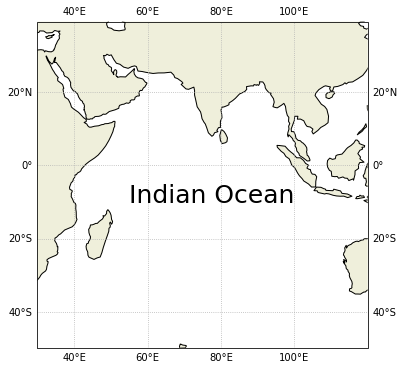

In [5]:
step=1
proj = ccrs.PlateCarree()                            # Choose the projection
cmap = plt.cm.get_cmap('Spectral_r')                 # Choose the colormap
fig = plt.figure(figsize=(10,6))                     # Set the size of the figure
ax  = plt.axes(projection=proj)                            
ax.add_feature(cfeature.LAND)                        # Land color
ax.add_feature(cfeature.COASTLINE)                   # Add coastlines
ax.gridlines(linestyle=':',draw_labels=True)         # Add gridlines
ax.set_extent([lonmin,lonmax,latmin,latmax])         # Set the extent of the figure
ax.text(55,-10,'Indian Ocean',fontsize=25)           # For writing Indian Ocean

### 2) North-South transect of conservative temperature (Θ), absolute salinity (SA), oxygen, nitrates, silicate and phosphates

In [6]:
lat_tr=ds_temp.lat.sel(lat=slice(-40.5,10.5)) # Setting the latitude range for Indian Ocean 

# Choosing the 75.5 E for North-South transect and extracting the values of the variables at the selected sub-domain.

temp_tr=ds_temp.t_an.sel(time=0,lon=75.5,method='nearest').sel(lat=slice(-40.5,10.5))           # Temperature
sali_tr=ds_sali.s_an.sel(time=0,lon=75.5,method='nearest').sel(lat=slice(-40.5,10.5))           # Salinity
oxy_tr=ds_oxy.o_an.sel(time=0,lon=75.5,method='nearest').sel(lat=slice(-40.5,10.5))             # Oxygen
sili_tr=ds_sili.i_an.sel(time=0,lon=75.5,method='nearest').sel(lat=slice(-40.5,10.5))           # Silicate
nitr_tr=ds_nitr.n_an.sel(time=0,lon=75.5,method='nearest').sel(lat=slice(-40.5,10.5))           # Nitrate
phos_tr=ds_phos.p_an.sel(time=0,lon=75.5,method='nearest').sel(lat=slice(-40.5,10.5))           # Phosphate

In [7]:
p = gsw.p_from_z(-dep,lat_tr)                            # Using gsw module to extract Pressure values using depth value      
SA=gsw.SA_from_SP(sali_tr,p,75.5,lat_tr)                 # Using gsw module to extract Absolute salinity values using practical salinity value  
CT=gsw.CT_from_t(SA,temp_tr,p)                           # Using gsw module to extract Conservative temperature values using Absolute salinity, temperature and pressure values 

In [8]:
dep.shape,lat_tr.shape

((102,), (52,))

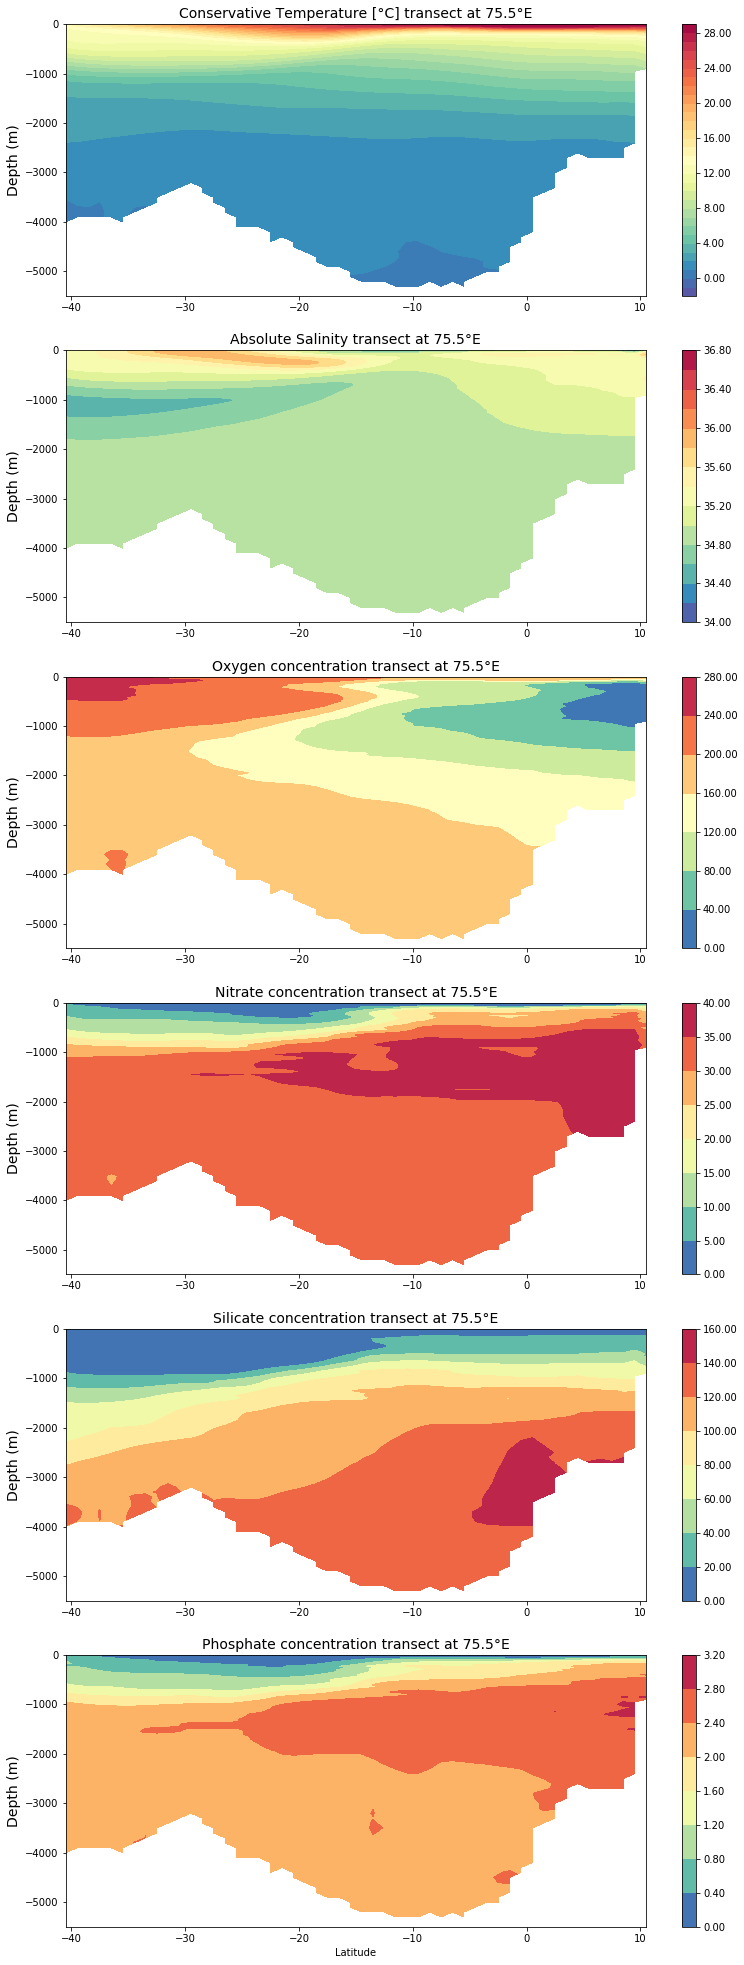

In [9]:
# Plotting the transects 

fig1, (ax1, ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(13,35))
ct=ax1.contourf(lat_tr,-dep,CT,np.arange(-2,30,1),cmap='Spectral_r')
ax1.set_ylabel('Depth (m)',fontsize=14)
cb = plt.colorbar(ct,ax=ax1,format='%.2f')
ax1.set_title('Conservative Temperature [°C] transect at 75.5°E',fontsize =14)

sa = ax2.contourf(lat_tr,-dep,SA,np.arange(34,37,0.2),cmap='Spectral_r')
ax2.set_ylabel('Depth (m)',fontsize=14)
ax2.set_title('Absolute Salinity transect at 75.5°E',fontsize =14)
cb2 = plt.colorbar(sa,ax=ax2,orientation='vertical',format='%.2f')

op = ax3.contourf(lat_tr,-dep,oxy_tr,cmap='Spectral_r')
ax3.set_ylabel('Depth (m)',fontsize=14)
ax3.set_title('Oxygen concentration transect at 75.5°E',fontsize =14)
cb3 = plt.colorbar(op,ax=ax3,orientation='vertical',format='%.2f')

ni = ax4.contourf(lat_tr,-dep,nitr_tr,cmap='Spectral_r')
ax4.set_ylabel('Depth (m)',fontsize=14)
ax4.set_title('Nitrate concentration transect at 75.5°E',fontsize =14)
cb4 = plt.colorbar(ni,ax=ax4,orientation='vertical',format='%.2f')

si = ax5.contourf(lat_tr,-dep,sili_tr,cmap='Spectral_r')
ax5.set_ylabel('Depth (m)',fontsize=14)
ax5.set_title('Silicate concentration transect at 75.5°E',fontsize =14)
cb5 = plt.colorbar(si,ax=ax5,orientation='vertical',format='%.2f')

po = ax6.contourf(lat_tr,-dep,phos_tr,cmap='Spectral_r')
ax6.set_ylabel('Depth (m)',fontsize=14)
ax6.set_xlabel('Latitude')
ax6.set_title('Phosphate concentration transect at 75.5°E',fontsize =14)
cb6 = plt.colorbar(po,ax=ax6,orientation='vertical',format='%.2f')

### 3) Transect of potential density

In [10]:
PD = gsw.sigma1(SA,CT)                 # Using gsw module, extracting the values of potential density using Absolute salinity and Conservative temperature.

Text(0.5, 1.0, 'Potential Density [kg/m³] transect at 75.5°E')

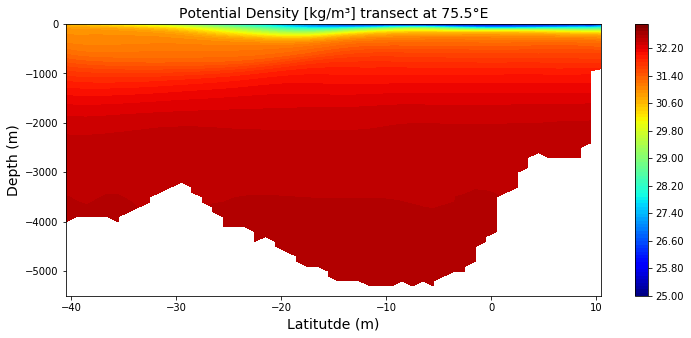

In [11]:
# Plotting the transect
fig2, ax7 = plt.subplots(1,1,figsize=(12,5))
pdp=ax7.contourf(lat_tr,-dep,PD,np.arange(25,33,0.1),cmap='jet')
ax7.set_ylabel('Depth (m)',fontsize=14)
ax7.set_xlabel('Latitutde (m)',fontsize=14)
cb7 = plt.colorbar(pdp,ax=ax7,format='%.2f')
ax7.set_title('Potential Density [kg/m³] transect at 75.5°E',fontsize =14)
#ax7.contour(pdp,linestyles='dashed',colors='k')

### 4) Conservative temperature - Salinity plot

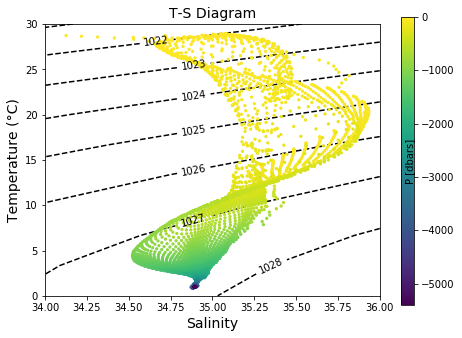

In [12]:
fig3, ax8 = plt.subplots(1,1,figsize=(6,5))
ts=ax8.scatter(SA,CT,s=5,c=-p)                                       # Scatter plot for Conservative temperature on the Y axis and Absolute salinity on X axis
plt.title('T-S Diagram',fontsize=14)             
ax8.set_xlabel('Salinity',fontsize=14)
ax8.set_ylabel('Temperature (°C)',fontsize=14)
x_sa=np.linspace(34,36,10)                                           # Choosing the range of absolute salinity for plotting isopycnals
y_ct=np.linspace(0,30,10)                                            # Choosing the range of conservative temperature for plotting isopycnals
X,Y=np.meshgrid(x_sa,y_ct)                                           # Creating meshgrid
rho=gsw.rho(X,Y,0)                                                   # Calculating density from the selected range of absolute salinity and conservative temperature values 
cs=ax8.contour(X,Y,rho,linestyles='dashed',colors='k',zorder=0)      #  Plotting isopycnals
ax8.clabel(cs,fmt= '%1d')                                            # Writing the value of density 
wi,hi  = 0.03,0.8
xc,yc  = 0.95,0.1
cax    = fig3.add_axes([xc,yc,wi,hi])
cb     = plt.colorbar(ts,cax,orientation='vertical')
cb.set_label('P [dbars]',fontsize=10,labelpad=-50)
cb.ax.tick_params(labelsize=10)

### 5) Water masses

Text(34.6, 26, 'ITF')

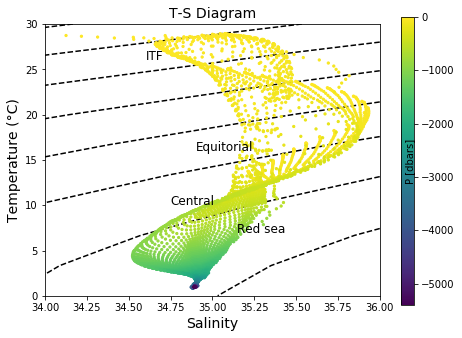

In [13]:
###### The main water masses in the Indian Ocean are - Indian Ocean Central water, Indian Ocean equitorial water, ITF water and red sea water (labelled in TS diagram below)

fig3, ax8 = plt.subplots(1,1,figsize=(6,5))
ts=ax8.scatter(SA,CT,s=5,c=-p)                                       # Scatter plot for Conservative temperature on the Y axis and Absolute salinity on X axis
plt.title('T-S Diagram',fontsize=14)             
ax8.set_xlabel('Salinity',fontsize=14)
ax8.set_ylabel('Temperature (°C)',fontsize=14)
x_sa=np.linspace(34,36,10)                                           # Choosing the range of absolute salinity for plotting isopycnals
y_ct=np.linspace(0,30,10)                                            # Choosing the range of conservative temperature for plotting isopycnals
X,Y=np.meshgrid(x_sa,y_ct)                                           # Creating meshgrid
rho=gsw.rho(X,Y,0)                                                   # Calculating density from the selected range of absolute salinity and conservative temperature values 
cs=ax8.contour(X,Y,rho,linestyles='dashed',colors='k',zorder=0)      #  Plotting isopycnals
#ax8.clabel(cs,fmt= '%1d')                                            # Writing the value of density 
wi,hi  = 0.03,0.8
xc,yc  = 0.95,0.1
cax    = fig3.add_axes([xc,yc,wi,hi])
cb     = plt.colorbar(ts,cax,orientation='vertical')
cb.set_label('P [dbars]',fontsize=10,labelpad=-50)
cb.ax.tick_params(labelsize=10)

ax8.text(34.75, 10, 'Central', fontsize=12)
ax8.text(34.90, 16, 'Equitorial', fontsize=12)
ax8.text(35.15, 7, 'Red sea', fontsize=12)
ax8.text(34.60, 26, 'ITF', fontsize=12)

### 6) Algorithm to calculate the geostrophic currents at some given depth

#### We can integrate the thermal wind equation in z coordinate to calculate the geostrophic currents at some give depth. The thermal wind eqations are as following: 

In [14]:
%%latex
\begin{eqnarray}
\frac{\partial v}{\partial z} & = - \frac{g}{f\rho_{ref}}\frac{\partial \rho}{\partial x}\quad \\
\frac{\partial u}{\partial z} & = \frac{g}{f\rho_{ref}}\frac{\partial \rho}{\partial y}\quad  
\end{eqnarray}

<IPython.core.display.Latex object>

#### The terms involved in the thermal wind equations are acceleration due to gravity (g), coriolis parameter (f), reference density (rho ref), spherical distance between lat and lon points (dx,dy), change in density (drho) and dz.
#### We can integrate this equation from a level of no motion (z ref) to depth (z) or till surface.

In [15]:
%%latex
\begin{eqnarray}
\int_{z_{ref}}^{z} du & = \int_{z_{ref}}^{z}\frac{g}{f\rho_{ref}}\frac{\partial \rho}{\partial y} dz \\
\int_{z_{ref}}^{z} dv & = \int_{z_{ref}}^{z}\frac{g}{f\rho_{ref}}\frac{\partial \rho}{\partial x} dz
\end{eqnarray}

<IPython.core.display.Latex object>

### 7) Program to calculate surface currents from the hydrology.

In [16]:
# Initializing the constants

R_earth=6371.008*10**3    # Radius of the earth in meters
g = 9.81                  # acceleration due to gravity in m/s*s
rho_ref = 1500            # Reference density 

In [17]:
lon_sub = ds_temp.lon.sel(lon=slice(40.5,120.5))                                                 # Choosing the longitude domain of interest (Indian Ocean)
lat_sub = ds_temp.lat.sel(lat=slice(-20.5,25))                                                   # Choosing the latitude domain of interest (Indian Ocean)
Lon_sub,Lat_sub=np.meshgrid(lon_sub,lat_sub)                                                     # Creating meshgrid
temp_sub=ds_temp.t_an.sel(lon=slice(40.5,120.5)).sel(lat=slice(-20.5,25.5)).isel(time=0)         # Extracting the temperature value for the domain of interest (Indian Ocean)
sali_sub=ds_sali.s_an.sel(lon=slice(40.5,120.5)).sel(lat=slice(-20.5,25.5)).isel(time=0)         # Extracting the salinity values for the domain of interest (Indian Ocean)

In [18]:
pres_sub = gsw.p_from_z(-dep, lat_sub)                                     # Using gsw module to extract Pressure values using depth value                
SA_sub= gsw.SA_from_SP(sali_sub,pres_sub,lon_sub,lat_sub)                  # Using gsw module to extract Absolute salinity values using practical salinity and pressure value
CT_sub = gsw.CT_from_t(SA_sub, temp_sub, pres_sub)                         # Using gsw module to extract conservative temperature values using absolute salinty, in-situ temperature value

rho_sub= gsw.rho(SA_sub,CT_sub,pres_sub)                                   # Using gsw module to extract density values using absolute salinity, conservative temerature and pressure value

In [19]:
# Creating dx,dy matrix

dx,dy=np.zeros_like(Lat_sub),np.zeros_like(Lat_sub)                      

dx[:,:-1]= R_earth*np.cos(0.5*(Lat_sub[:,1:]+Lat_sub[:,:-1])*np.pi/180)*(Lon_sub[:,1:]-Lon_sub[:,:-1])*np.pi/180        
dy[:-1,:]= R_earth*(Lat_sub[1:,:]-Lat_sub[:-1,:])*np.pi/180

# Boundary conditions to make sure that dx and dy are not zero at the boundaries

dy[-1,:]=dy[-2,:] 
dx[:,-1]=dx[:,-2]

# Calculating coriolois parameter

fu=2.*np.pi/86400.*np.sin(0.5*(Lat_sub[:-1,:]+Lat_sub[1:,:])*np.pi/180)
fv=2.*np.pi/86400.*np.sin(0.5*(Lat_sub[:,:-1]+Lat_sub[:,1:])*np.pi/180)

In [20]:
# Calculating drho/dx and drho/dy

drho_dy = (rho_sub.data[:,1:,:] - rho_sub.data[:,:-1,:]) / dy[:-1,:] 
drho_dx = (rho_sub.data[:,:,1:] - rho_sub.data[:,:,:-1]) / dx[:,:-1] 

# Calculating dz

dep_mid=np.zeros((103))                                             #(103=number of depth points+1)
dep_mid[1:-1]=0.5*(dep.data[1:]+dep.data[:-1])                      # Taking depth at the center of the grid
dep_mid[0]=dep[0]                                                   #Z at surface
dep_mid[-1]=dep[-1]                                                 #Z at the bottom

dz=np.diff(dep_mid)                                                 # Difference between subsiquent depth points

In [21]:
# Using thermal wind equation to calculate du and dv

du_up=g/(rho_ref*fu[np.newaxis,:,:])*drho_dy*dz[:,np.newaxis,np.newaxis]
dv_up=-g/(rho_ref*fv[np.newaxis,:,:])*drho_dx*dz[:,np.newaxis,np.newaxis]

C:\Users\ligin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
dep.data


array([0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01, 2.50e+01,
       3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01, 5.00e+01, 5.50e+01,
       6.00e+01, 6.50e+01, 7.00e+01, 7.50e+01, 8.00e+01, 8.50e+01,
       9.00e+01, 9.50e+01, 1.00e+02, 1.25e+02, 1.50e+02, 1.75e+02,
       2.00e+02, 2.25e+02, 2.50e+02, 2.75e+02, 3.00e+02, 3.25e+02,
       3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02, 4.75e+02,
       5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02, 7.00e+02, 7.50e+02,
       8.00e+02, 8.50e+02, 9.00e+02, 9.50e+02, 1.00e+03, 1.05e+03,
       1.10e+03, 1.15e+03, 1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03,
       1.40e+03, 1.45e+03, 1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03,
       1.70e+03, 1.75e+03, 1.80e+03, 1.85e+03, 1.90e+03, 1.95e+03,
       2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03, 2.40e+03, 2.50e+03,
       2.60e+03, 2.70e+03, 2.80e+03, 2.90e+03, 3.00e+03, 3.10e+03,
       3.20e+03, 3.30e+03, 3.40e+03, 3.50e+03, 3.60e+03, 3.70e+03,
       3.80e+03, 3.90e+03, 4.00e+03, 4.10e+03, 4.20e+03, 4.30e

In [120]:
# Integrating the thermal wind equation from point of no motion to the surface using np.cumsum

Zref = 1500
knm=np.nonzero(dep.data==Zref)

#zonal component
ug= np.zeros_like(du_up)
ug[:56,:,:]=np.cumsum(du_up[56-1::-1,:,:],axis=0)       #integration to get the zonal component, from the bottom layer to the top

#meridian component 
vg = np.zeros_like(dv_up)
vg[:56,:,:]=np.cumsum(dv_up[56-1::-1,:,:],axis=0)       #integration to get the meridional component, from the bottom layer to the top

### 8) Map of surface currents

In [121]:
ug_center = 0.5*(ug[:,:-1,1:-1]+ug[:,1:,1:-1])         # Taking ug to the center of the grid
vg_center = 0.5*(vg[:,1:-1,:-1]+vg[:,1:-1,1:])         # Taking vg to the center of the grid

In [122]:
lonsub_c=0.25*(Lon_sub[:-1,:-1]+Lon_sub[1:,1:]+Lon_sub[:-1,1:]+Lon_sub[1:,:-1])   # Taking longitude to the center of the grid
latsub_c=0.25*(Lat_sub[:-1,:-1]+Lat_sub[1:,1:]+Lat_sub[:-1,1:]+Lat_sub[1:,:-1])   # Taking latitude to the center of the grid

In [123]:
#Setting domain for plotting

lon_plot=lonsub_c[:-1,:-1]               
lat_plot=latsub_c[:-1,:-1]

C:\Users\ligin\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\ligin\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


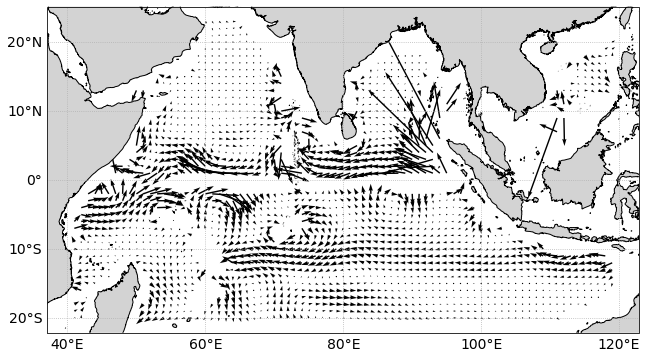

In [124]:
#plotting the superficial currents
proj=ccrs.PlateCarree()            
#features 
land_10m=cfeature.NaturalEarthFeature(category='physical',
                            name='land',
                            scale='10m',
                            edgecolor='k',
                            facecolor='lightgrey')

#the plot

fig=plt.figure(figsize=(20,6))
ax=plt.axes(projection=proj)
gl1=ax.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'size': 14, 'color': 'black'}
gl1.ylabel_style = {'size': 14, 'color': 'black'}

#adding features
ax.add_feature(land_10m)
#adding the velocity vector
ax.quiver(lon_plot,lat_plot,ug_center[0,:,:],vg_center[0,:,:])
#ax.streamplot(lon_plot,lat_plot,ug_center[0,:,:],vg_center[0,:,:])


### 9) Surface geostrophic currents from altimetry

In [125]:
file_al='altimetry.nc'
ds_al = xr.open_dataset(file_al,decode_times=False)
adt=ds_al.adt
sla=ds_al.sla
lon=ds_al.longitude
lat=ds_al.latitude

In [126]:
lon_sub = lon.sel(longitude=slice(40.5,120.5))
lat_sub = lat.sel(latitude=slice(-20.5,25))

lonsub,latsub=np.meshgrid(lon_sub,lat_sub)
slasub=sla.sel(longitude=slice(40.5,120.5)).sel(latitude=slice(-20.5,25)).isel(time=0)

In [127]:
g=9.81
Rearth=6400e3


f_atup=2*np.pi/86400*np.sin(0.5*(latsub[1:,:]+latsub[:-1,:])*np.pi/180)
dy=Rearth*(latsub[1:,:]-latsub[:-1,:])*np.pi/180

f_atvp=4*np.pi/86400*np.sin(0.5*(latsub[:,1:]+latsub[:,:-1])*np.pi/180)
dx=Rearth*np.cos(0.5*(latsub[:,1:]+latsub[:,:-1])*np.pi/180)*(lonsub[:,1:]-lonsub[:,:-1])*np.pi/180


In [128]:
usub=-g/f_atup*(slasub.data[1:,:]-slasub.data[:-1,:])/dy
vsub=g/f_atvp*(slasub.data[:,1:]-slasub.data[:,:-1])/dx

usub_atqp=0.5*(usub[:,:-1]+usub[:,1:])
vsub_atqp=0.5*(vsub[:-1,:]+vsub[1:,:])

C:\Users\ligin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\ligin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.
C:\Users\ligin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in add
  after removing the cwd from sys.path.


In [129]:
lonsubq=0.25*(lonsub[:-1,:-1]+lonsub[1:,:-1]+lonsub[1:,1:]+lonsub[:-1,1:])
latsubq=0.25*(latsub[:-1,:-1]+latsub[1:,:-1]+latsub[1:,1:]+latsub[:-1,1:])

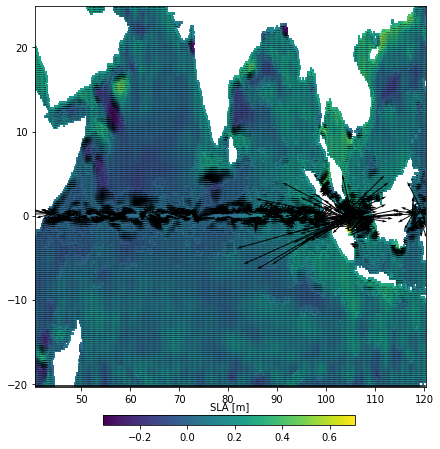

In [130]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
cp=ax.pcolor(lonsub,latsub,slasub)
qk=ax.quiver(lonsubq,latsubq,usub_atqp,vsub_atqp)
ax.plot(lonsubq[np.abs(latsubq+27.5)==np.min(np.abs(latsubq+27.5))],latsubq[np.abs(latsubq+27.5)==np.min(np.abs(latsubq+27.5))],'k-')
# ~~~ colorbar ~~~
wi,hi  = 0.5,0.02
xc,yc  = 0.26,0.05
cax    = fig.add_axes([xc,yc,wi,hi])
cb     = plt.colorbar(cp,cax,orientation='horizontal')
cb.set_label('SLA [m]',fontsize=10,labelpad=-40)
cb.ax.tick_params(labelsize=10)

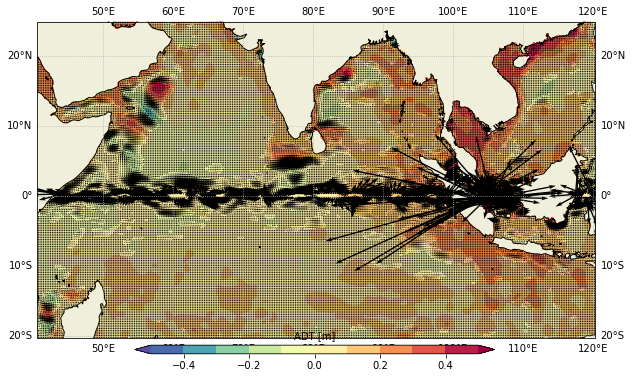

In [131]:
###########################################
# Plot Global Map of ADT
###########################################
# ~~~ plot options 
step=1
proj = ccrs.PlateCarree()                            # Choose the projection
cmap = plt.cm.get_cmap('Spectral_r')                 # Choose the colormap

fig = plt.figure(figsize=(10,6))
ax  = plt.axes(projection=proj)
ax.add_feature(cfeature.LAND)                        # Land color
ax.add_feature(cfeature.COASTLINE)                   # Add coastlines
ax.gridlines(linestyle=':',draw_labels=True)         # Add gridlines

# ~ Plot ADT
ctf = ax.contourf(lonsub,latsub,slasub,levels=np.arange(-0.5,0.6,0.1),cmap=cmap,extend='both')
ax.quiver(lonsubq[::step,::step],latsubq[::step,::step],usub_atqp[::step,::step],vsub_atqp[::step,::step])

# ~~~ colorbar ~~~
wi,hi  = 0.5,0.02
xc,yc  = 0.26,0.1
cax    = fig.add_axes([xc,yc,wi,hi])
cb     = plt.colorbar(ctf,cax,orientation='horizontal')
cb.set_label('ADT [m]',fontsize=10,labelpad=-40)
cb.ax.tick_params(labelsize=10)

#### The results obtained from altimetry is more detailed because of the increased resolution of data. But the surface geostrophic currents are similar using both methods.